
## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Exploration

In [3]:
features = pd.read_csv("Data/features.csv")
train = pd.read_csv("Data/train.csv")
stores = pd.read_csv("Data/stores.csv")
test = pd.read_csv("Data/test.csv")

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


## Data Preprocesing 

In [5]:
#merging into one dataframe
df1 = train.merge(features, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
df = df1.merge(stores, on = ['Store'], how = 'inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## Explaratory Data Analysis

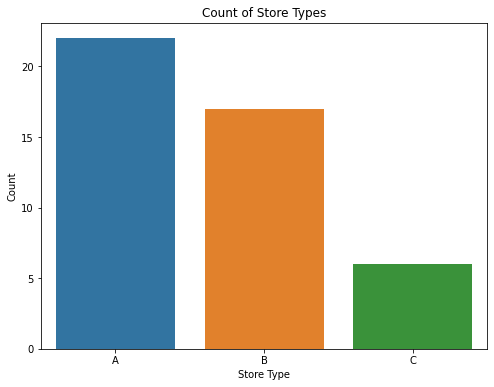

In [8]:
# Countplot of store types
plt.figure(figsize=(8, 6))
sns.countplot(data=stores, x='Type')
plt.title('Count of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

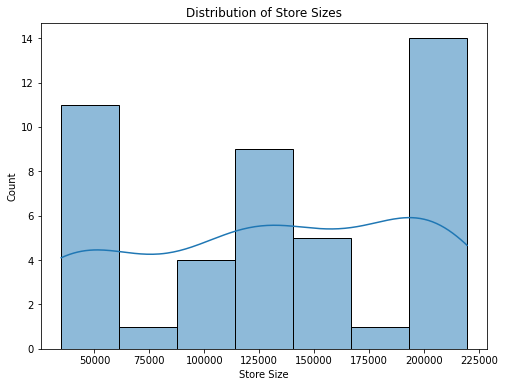

In [9]:
# Distribution of store sizes
plt.figure(figsize=(8, 6))
sns.histplot(data=stores, x='Size', kde=True)
plt.title('Distribution of Store Sizes')
plt.xlabel('Store Size')
plt.ylabel('Count')
plt.show()

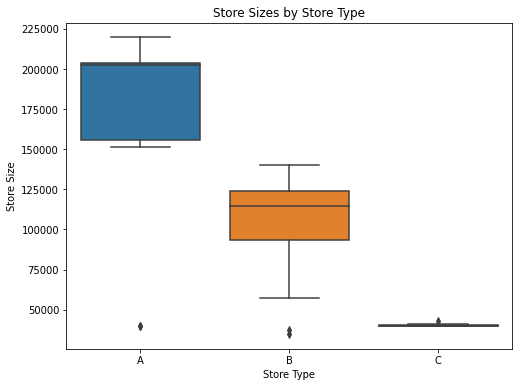

In [10]:
# Boxplot of store sizes by store type
plt.figure(figsize=(8, 6))
sns.boxplot(data=stores, x='Type', y='Size')
plt.title('Store Sizes by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Store Size')
plt.show()

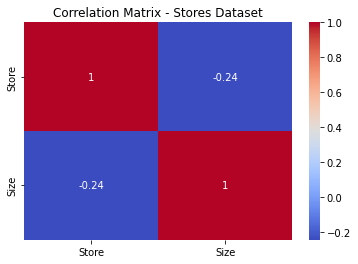

In [11]:
# Correlation matrix
correlation_matrix = stores.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Stores Dataset')
plt.show()

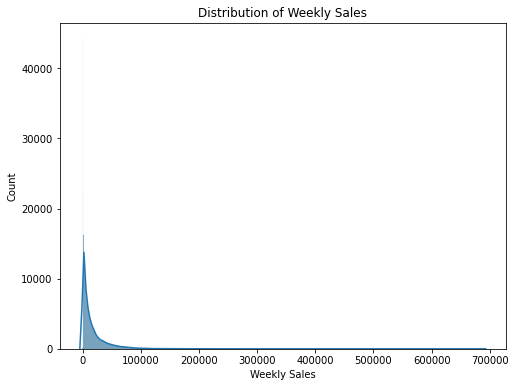

In [12]:
# Distribution of weekly sales
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='Weekly_Sales', kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Count')
plt.show()

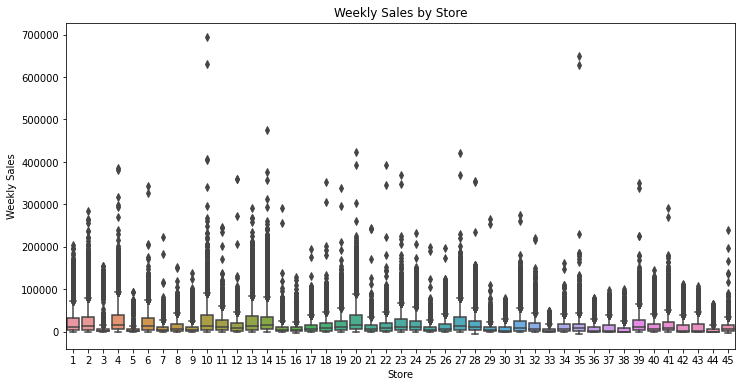

In [13]:
# Boxplot of weekly sales by store
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='Store', y='Weekly_Sales')
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

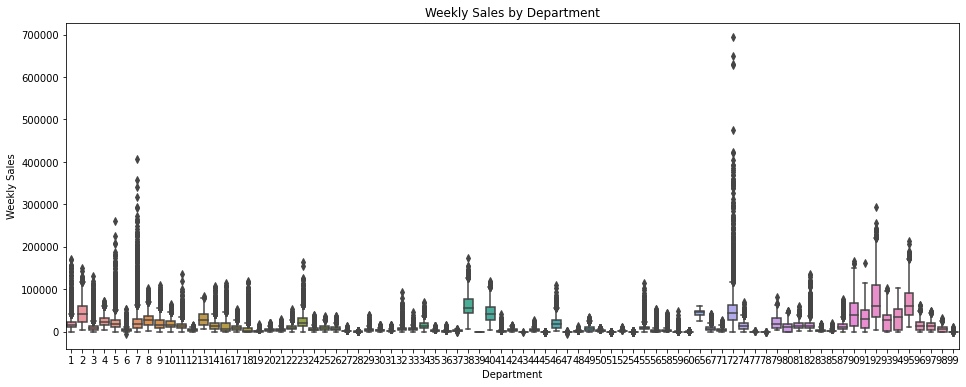

In [14]:
# Boxplot of weekly sales by department
plt.figure(figsize=(16, 6))
sns.boxplot(data=train, x='Dept', y='Weekly_Sales')
plt.title('Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.show()

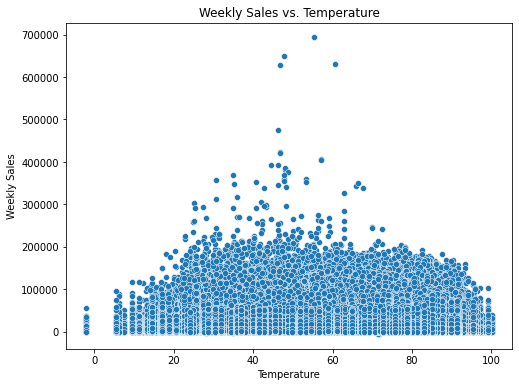

In [16]:
# Scatter plot of weekly sales vs. temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

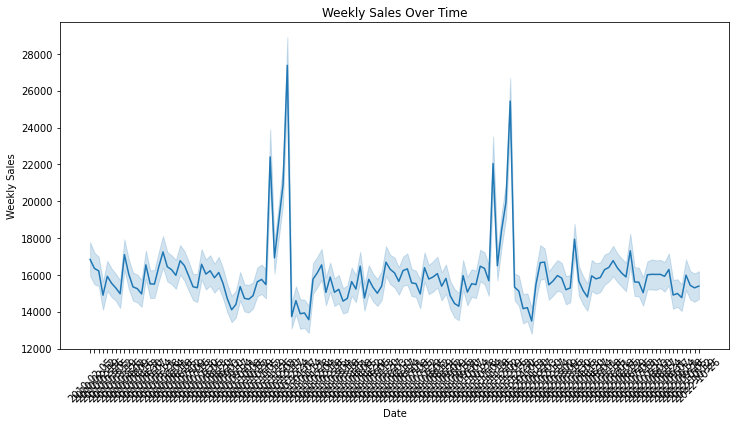

In [6]:
# Line plot of weekly sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()

### Train Data

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(421570, 16)

In [19]:
(df.isnull().sum()/len(df))*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [20]:
# We will drop the Markdown columns as they have null values over 30%:

df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 35.8+ MB


In [22]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [23]:
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64)

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(keys = "Date", inplace = True)

In [25]:
df['Weekly_Sales'].dtype

dtype('float64')

In [26]:
df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [27]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


In [28]:
# Removing Outliers:

columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

Q3 = df[columns].quantile(.75)
Q1 = df[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 -  1.5*IQR

for column in columns:
    df[column] = np.where(df[column] > UL[column], UL[column], np.where(df[column] < LL[column], LL[column], df[column]))

In [29]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.091260,3.361027,171.201947,7.831783,136727.915739
std,12.785297,30.492054,22711.183519,18.444122,0.458515,39.159276,1.497917,60980.583328
min,1.000000,1.000000,-4988.940000,5.280000,2.472000,126.064000,4.369500,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,11.093500,219622.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   Type          421570 non-null  object 
 9   Size          421570 non-null  float64
dtypes: bool(1), float64(6), int64(2), object(1)
memory usage: 32.6+ MB


In [31]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315.0
2010-02-05,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315.0
2010-02-05,1,3,13740.12,False,42.31,2.572,211.096358,8.106,A,151315.0
2010-02-05,1,4,39954.04,False,42.31,2.572,211.096358,8.106,A,151315.0
2010-02-05,1,5,32229.38,False,42.31,2.572,211.096358,8.106,A,151315.0


### Test Data

In [32]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [33]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [34]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [35]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [36]:
df_test1 = test.merge(features, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
test2 = df_test1.merge(stores, on = ['Store'], how = 'inner')

In [37]:
test2.head()
test2

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221


In [38]:
test2.drop(axis = 1, columns = ["MarkDown1", "MarkDown2","MarkDown3","MarkDown4", "MarkDown5"], inplace = True)

In [39]:
(test2.isnull().sum()/len(test2))*100

Store            0.00000
Dept             0.00000
Date             0.00000
IsHoliday        0.00000
Temperature      0.00000
Fuel_Price       0.00000
CPI             33.16589
Unemployment    33.16589
Type             0.00000
Size             0.00000
dtype: float64

In [40]:
# Filling null values with mean

test2['CPI'] = test2['CPI'].fillna(test2['CPI'].mean())
test2['Unemployment'] = test2['Unemployment'].fillna(test2['Unemployment'].mean())

In [41]:
# Removing outliers

columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

Q3 = test2[columns].quantile(.75)
Q1 = test2[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 -  1.5*IQR

for column in columns:
    test2[column] = np.where(test2[column] > UL[column], UL[column], np.where(test2[column] < LL[column], LL[column], test2[column]))

In [42]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   CPI           115064 non-null  float64
 7   Unemployment  115064 non-null  float64
 8   Type          115064 non-null  object 
 9   Size          115064 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 8.9+ MB


In [43]:
test2['Date'] = pd.to_datetime(test2['Date'])
test2.set_index(keys = 'Date', inplace = True)
df_test1.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [44]:
test2.shape

(115064, 9)

In [45]:
test.duplicated().sum()

0

## Converting Categorical Data to Numerical 

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['IsHoliday'] = encoder.fit_transform(df['IsHoliday'])
df['Type'] = encoder.fit_transform(df['Type'])
test2['IsHoliday'] = encoder.fit_transform(test2['IsHoliday'])

In [47]:
test2['Type'] = encoder.fit_transform(test2['Type'])

In [48]:
df.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type              int32
Size            float64
dtype: object

In [49]:
test2.dtypes

Store             int64
Dept              int64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type              int32
Size            float64
dtype: object

In [50]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,2,50605.27,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,3,13740.12,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,4,39954.04,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,5,32229.38,0,42.31,2.572,211.096358,8.106,0,151315.0


In [51]:
df['CPI'] = df['CPI'].round(2)

In [52]:
test2.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-11-02,1,1,0,55.32,3.386,223.462779,6.573,0,151315.0
2012-11-02,1,2,0,55.32,3.386,223.462779,6.573,0,151315.0
2012-11-02,1,3,0,55.32,3.386,223.462779,6.573,0,151315.0
2012-11-02,1,4,0,55.32,3.386,223.462779,6.573,0,151315.0
2012-11-02,1,5,0,55.32,3.386,223.462779,6.573,0,151315.0


## Checking Multicollinearity

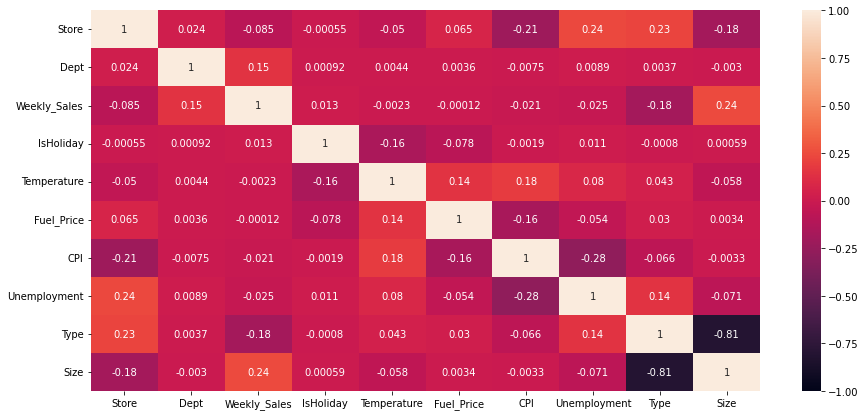

In [53]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);

In [54]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Removing Multicollinearity

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Features'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data

,Features,VIF
0,Store,4.556908
1,Dept,3.151310
2,Weekly_Sales,1.635615
3,IsHoliday,1.102028
4,Temperature,13.114620
5,Fuel_Price,34.664951
6,CPI,15.993707
7,Unemployment,24.668334
8,Type,4.981511
9,Size,16.003423


In [56]:
# As Size has higher VIF between Type and Size, we will drop Size

df.drop(['Size'], axis = 1, inplace = True)

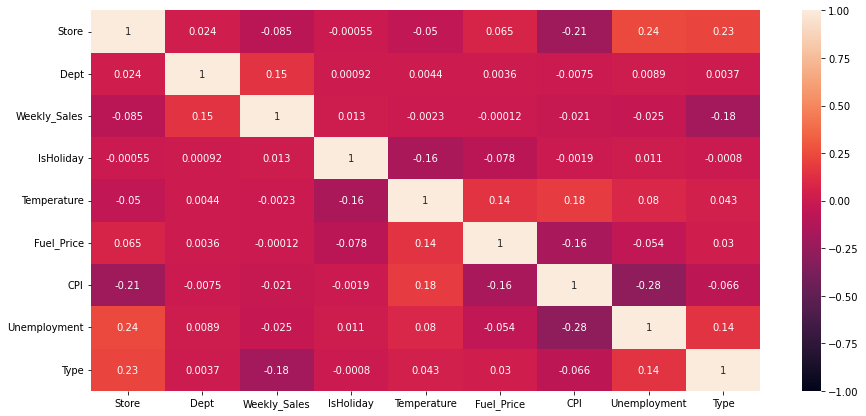

In [57]:
# Now we will call heatmapt again to see multicollinearity

plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);

## Train Test Split

In [58]:
x = df.drop(['Weekly_Sales'], axis = 1)
y = df['Weekly_Sales']

In [59]:
x.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type'],
      dtype='object')

In [60]:
y.head()

Date
2010-02-05    24924.50
2010-02-05    50605.27
2010-02-05    13740.12
2010-02-05    39954.04
2010-02-05    32229.38
Name: Weekly_Sales, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [62]:
print("x Train Shape :",x_train.shape)
print("x Val Shape   :",x_val.shape)
print("y Train Shape :",y_train.shape)
print("y Val Shape   :",y_val.shape)

x Train Shape : (295099, 8)
x Val Shape   : (126471, 8)
y Train Shape : (295099,)
y Val Shape   : (126471,)


In [63]:
x.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type'],
      dtype='object')

### Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)

In [86]:
lr.score(x_val, y_val)

0.06149084741656563

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_pred, y_val)
r2 = r2_score(y_pred, y_val)
print('Root Mean Square Error = ', np.sqrt(mse))
print('R2 Score = ', r2)

Root Mean Square Error =  21977.570095745654
R2 Score =  -14.75985023617903


### Decision Tree Regression

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_val)

In [69]:
rms_dt = np.sqrt(mean_squared_error(y_pred_dt, y_val))
r2_dt = r2_score(y_pred_dt, y_val)
print('RMSE of DT = ', rms_dt)
print('R2 Score of DT = ', r2_dt)

RMSE of DT =  7778.514498701807
R2 Score of DT =  0.8861117397424264


### Random Forest Regression

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rf = RandomForestRegressor()
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_val)

In [72]:
rms_rf = np.sqrt(mean_squared_error(y_pred_rf, y_val))
r2_rf = r2_score(y_pred_rf, y_val)
print('RMSE of RF = ', rms_rf)
print('R2 Score of RF = ', r2_rf)

RMSE of RF =  5565.621005092228
R2 Score of RF =  0.9373547251134687


## XGBoost

In [75]:
import xgboost as xgb


In [76]:
import warnings

In [77]:
xg_reg=xgb.XGBRegressor(objective='reg:squarederror',nthread=4,n_estimators=500,max_depth=4,learning_rate=0.5)

In [79]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)

In [80]:
y_pred=xg_reg.predict(x_val)

In [83]:
print('Accuracy:',xg_reg.score(x_val,y_val)*100,'%')

rms= mean_squared_error(y_val,y_pred,squared=False)
print('RMSE:',rms)

r2_xg=r2_score(y_pred,y_val)
print('R2 score of XGBoost:',r2_xg)

Accuracy: 91.139826858775 %
RMSE: 6752.763224191785
R2 score of XGBoost: 0.9006349040489972


## SAVING THE MODEL

In [ ]:
import pickle


In [ ]:
pickle.dump(rf,open('model3.pk1','wb'))

In [ ]:
model=pickle.load(open('model3.pk1','rb'))
print(model.predict([[1,2,0,42.00,2.572,211.09,8.106,0]]))